## **Products categorization with Distilbert model**





In [1]:
!pip install transformers
#!pip install tensorflow
#!pip install protobuf==3.20.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 27.0 MB/s 
     |████████████████████████████████| 7.6 MB 57.2 MB/s 
     |████████████████████████████████| 182 kB 71.8 MB/s 


**Importing the required libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from keras.models import Model
from tensorflow.keras import utils as np_utils
from keras.utils.np_utils import to_categorical

import transformers
from transformers import AutoTokenizer,TFDistilBertModel, DistilBertConfig
from transformers import TFAutoModel

import warnings
warnings.filterwarnings("ignore")

In [3]:
print(tf.__version__)
print(keras.__version__)

2.10.0
2.10.0


**Data is preprocessing**

In [75]:
# make all text lowercase
def text_lowercase(text):
    return text.lower()


# remove stopwords
def remove_stopwords(text):
    words = text.split()
    text = [i for i in words if not i in stop_words]
    text = ' '.join(text)
    return text


# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


# preprocess text string
def preprocessing(text):
    text = text_lowercase(text)
    text = remove_punctuation(text)
    text = remove_stopwords(text)
    return text


**Data is preprocessed and stored in csv file**

In [17]:
X = pd.read_csv("export.csv")['productDescription']

In [18]:
X

0         heating radiator renault megane ii 1.9 dci, 12...
1                          air cleaner filter box c 270 cdi
2                                               coil spring
3         heating blower button citroen saxo 1.1, 60 hp,...
4                      radio for toyota avensis (1997-2003)
                                ...                        
111868    coolant reservoir for s-class sedan s 400 cdi ...
111869    instrument cluster for audi a4 sedan b6 (11.20...
111870    gear shift console honda cr-v i 2.0 16v 4wd, 1...
111871    instrument cluster peugeot 405 i sedan 1.6, 94 hp
111872     cabrio hood motor for fortwo cabrio 450 , cabrio
Name: productDescription, Length: 111873, dtype: object

In [19]:
y = pd.read_csv("export-2.csv")['child_category']

In [7]:
y

0                 heating_radiators
1                  air_filter_boxes
2                      coil_springs
3                   heating_blowers
4         air_horns_klaxons_buzzers
                    ...            
111868           coolant_reservoirs
111869          instrument_clusters
111870    interior_dash_trim_panels
111871          instrument_clusters
111872       blower_motor_resistors
Name: child_category, Length: 111873, dtype: object

**Load previous cleaned up dataset**

In [21]:
df=pd.read_csv("export.csv")
df['category']=pd.read_csv("export-2.csv")['child_category']

In [24]:
df

,productDescription,category
0,"heating radiator renault megane ii 1.9 dci, 12...",heating_radiators
1,air cleaner filter box c 270 cdi,air_filter_boxes
2,coil spring,coil_springs
3,"heating blower button citroen saxo 1.1, 60 hp,...",heating_blowers
4,radio for toyota avensis (1997-2003),air_horns_klaxons_buzzers
...,...,...
111868,coolant reservoir for s-class sedan s 400 cdi ...,coolant_reservoirs
111869,instrument cluster for audi a4 sedan b6 (11.20...,instrument_clusters
111870,"gear shift console honda cr-v i 2.0 16v 4wd, 1...",interior_dash_trim_panels
111871,"instrument cluster peugeot 405 i sedan 1.6, 94 hp",instrument_clusters


**Data Understanding**

In [10]:
df.shape

(111873, 2)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111873 entries, 0 to 111872
Data columns (total 2 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   productDescription  111873 non-null  object
 1   category            111873 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


In [12]:
#types of categories
df['category'].value_counts()

modules                                              1080
diesel_fuel_injectors                                1041
mass_air_flow_meter_sensors                          1041
bumper_shock_absorbers_support_frames_and_holders    1033
manifolds_intake_exhaust                             1029
                                                     ... 
spare_wheels_with_tires                               311
summer_tires                                          302
commutators                                           296
windshield_washer_pumps                               287
heater_vents                                          272
Name: category, Length: 166, dtype: int64

In [13]:
df[df["productDescription"].str.len() > 150]

,productDescription,category
43538,gasoline fuel injector for renault clio ii hat...,gasoline_fuel_injectors


In [14]:
#df=df.head(100)

### **Data preparation**

Spliting the data into train and test sets:

In [25]:
X = df['productDescription']
y = df['category']

In [26]:
X

0         heating radiator renault megane ii 1.9 dci, 12...
1                          air cleaner filter box c 270 cdi
2                                               coil spring
3         heating blower button citroen saxo 1.1, 60 hp,...
4                      radio for toyota avensis (1997-2003)
                                ...                        
111868    coolant reservoir for s-class sedan s 400 cdi ...
111869    instrument cluster for audi a4 sedan b6 (11.20...
111870    gear shift console honda cr-v i 2.0 16v 4wd, 1...
111871    instrument cluster peugeot 405 i sedan 1.6, 94 hp
111872     cabrio hood motor for fortwo cabrio 450 , cabrio
Name: productDescription, Length: 111873, dtype: object

In [27]:
y

0                 heating_radiators
1                  air_filter_boxes
2                      coil_springs
3                   heating_blowers
4         air_horns_klaxons_buzzers
                    ...            
111868           coolant_reservoirs
111869          instrument_clusters
111870    interior_dash_trim_panels
111871          instrument_clusters
111872       blower_motor_resistors
Name: category, Length: 111873, dtype: object

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [29]:
encoder = LabelEncoder()
encoder.fit(y_train)

y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

num_classes = np.max(y_train) + 1
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [30]:
y_test.shape

(22375, 166)

In [31]:
y_train.shape

(89498, 166)

In [56]:
target_classes = encoder.classes_

In [74]:
target_classes

array(['a/c_and_climatronic_control_panels', 'abs_dsc_asr',
       'ac_compressors', 'active_suspension_modules',
       'active_suspension_self_leveling_shock_absorbers_shock_dampers',
       'aerials', 'air_conditioning_radiators', 'air_filter_boxes',
       'air_horns_klaxons_buzzers', 'air_hoses_induction_pipes',
       'air_intake_smooth_rubber_hoses', 'alloy_rims', 'alternators',
       'amplifiers', 'armrests', 'automatic_transmissions',
       'blinds_and_mechanisms', 'blower_motor_resistors', 'bonnet_locks',
       'boot_lid_key_locks', 'boot_lid_locks', 'brake_calipers',
       'brake_discs', 'brake_master_cylinders',
       'bumper_shock_absorbers_support_frames_and_holders',
       'buttons_panel_(seats_windows_mirrors_etc.)', 'carburetors',
       'cassette_and_cd_players', 'cd_changers',
       'central_vacuum_and_door_lock_actuators', 'coil_springs',
       'commutators',
       'compressors_for_air_suspension_hydraulic_suspension_pumps',
       'control_buttons_switch_h

### **DistilBERT model**

In [32]:
# Creating tokenizer
tokenizer = AutoTokenizer.from_pretrained('distilbert-base-uncased')

Now we have to load Distilbert model. In the Transformers library is avaliable Distilbert model and we use the `TFAutoModel` model (distilbert-base-uncased).

In [33]:
bert = TFAutoModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [34]:
for layer in bert.layers:
      layer.trainable = True

The function which allows to encode our dataset with tokenizer. We have decided on a maximum sentence length is 150 (maxlen).

In [3]:
sentence_length = 150

In [46]:
# Tokenization of the data
def text_encode(text, tokenizer, max_len=sentence_length):
    tokens = text.apply(lambda x: tokenizer(x,return_tensors='tf', 
                                            truncation=True,
                                            padding='max_length',
                                            max_length=max_len, 
                                            add_special_tokens=True))
    input_ids= []
    attention_mask=[]
    for item in tokens:
        input_ids.append(item['input_ids'])
        attention_mask.append(item['attention_mask'])
    input_ids, attention_mask=np.squeeze(input_ids), np.squeeze(attention_mask)

    return [input_ids,attention_mask]

Based on this encodings for our training and testing datasets are generated as follows:

In [47]:
X_train_input_ids, X_train_attention_mask = text_encode(X_train, tokenizer, max_len=sentence_length)
X_test_input_ids, X_test_attention_mask = text_encode(X_test, tokenizer, max_len=sentence_length)

In [38]:
len(X_train_input_ids)

89498

In [39]:
len(X_train_attention_mask)

89498

In [40]:
len(X_test_input_ids)

22375

In [41]:
len(X_test_attention_mask)

22375

### **Build the model**

We create a Distilbert model with pretrained weights and then we add two Dense layers with Dropout layer.

In [4]:
# model creation
def build_model(bert_model, maxlen=sentence_length):
    input_ids = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='input_ids')
    attention_mask = tf.keras.Input(shape=(maxlen,),dtype=tf.int32, name='attention_mask')
    
    sequence_output = bert_model(input_ids,attention_mask=attention_mask)
    output = sequence_output[0][:,0,:]
    output = tf.keras.layers.Dense(32,activation='relu')(output)
    output = tf.keras.layers.Dropout(0.2)(output)
    output = tf.keras.layers.Dense(166,activation='softmax')(output)

    model = tf.keras.models.Model(inputs = [input_ids,attention_mask], outputs = [output])
    model.compile(Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [24]:
model = build_model(bert, maxlen=sentence_length)

We train the model for 10 epoch:

In [25]:
history = model.fit(
    [X_train_input_ids, X_train_attention_mask],
    y_train,
    batch_size=32,
    validation_data=([X_test_input_ids, X_test_attention_mask], y_test),
    epochs=10
)

Epoch 1/10
2797/2797 [==============================] - 53889s 19s/step - loss: 1.9162 - accuracy: 0.6870 - val_loss: 0.6516 - val_accuracy: 0.9047
Epoch 2/10
2797/2797 [==============================] - 11729s 4s/step - loss: 0.7612 - accuracy: 0.8844 - val_loss: 0.4634 - val_accuracy: 0.9196
Epoch 3/10
2797/2797 [==============================] - 18136s 6s/step - loss: 0.5510 - accuracy: 0.9085 - val_loss: 0.3488 - val_accuracy: 0.9359
Epoch 4/10
2797/2797 [==============================] - 10736s 4s/step - loss: 0.4210 - accuracy: 0.9263 - val_loss: 0.2580 - val_accuracy: 0.9501
Epoch 5/10
2797/2797 [==============================] - 10670s 4s/step - loss: 0.3251 - accuracy: 0.9410 - val_loss: 0.2158 - val_accuracy: 0.9567
Epoch 6/10
2797/2797 [==============================] - 10288s 4s/step - loss: 0.2579 - accuracy: 0.9531 - val_loss: 0.1760 - val_accuracy: 0.9658
Epoch 7/10
2797/2797 [==============================] - 10124s 4s/step - loss: 0.2113 - accuracy: 0.9599 - val_loss: 

Visualization of training:

In [26]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

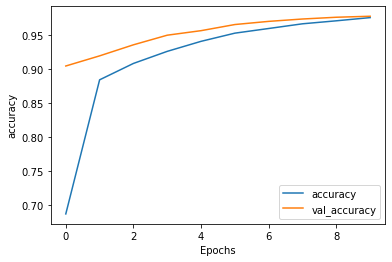

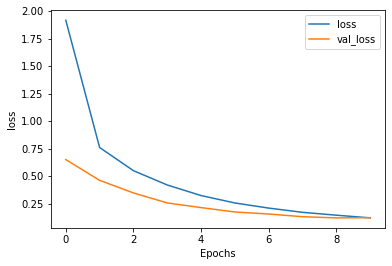

In [27]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Predictions on a test set:

In [28]:
loss, accuracy = model.evaluate([X_test_input_ids, X_test_attention_mask], y_test)
print('Test accuracy :', accuracy)

700/700 [==============================] - 869s 1s/step - loss: 0.1244 - accuracy: 0.9780
Test accuracy : 0.9779664874076843


In [41]:
from tensorflow.keras.models import save_model
save_model(model, "modelv1.h5")

In [42]:
from tensorflow.keras.models import load_model
 
# load model
from keras.models import load_model
# Assuming your model includes instance of an "AttentionLayer" class
loaded_model = tf.keras.models.load_model('modelv1.h5',custom_objects={'TFDistilBertModel':TFDistilBertModel}) 

In [50]:
y_pred=loaded_model.predict([X_test_input_ids, X_test_attention_mask])

700/700 [==============================] - 1087s 2s/step


In [53]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
from sklearn.metrics import classification_report
import numpy as np
y_predn = np.argmax(y_pred, axis=1) # Convert one-hot to index
y_testn= np.argmax(y_test, axis=1)
#print(classification_report(y_testn, y_predn, target_names=target_classes))

In [72]:
print(classification_report(y_testn, y_predn, target_names=target_classes))

                                                                      precision    recall  f1-score   support

                                  a/c_and_climatronic_control_panels       0.99      0.99      0.99       171
                                                         abs_dsc_asr       1.00      1.00      1.00       173
                                                      ac_compressors       0.97      0.98      0.97       151
                                           active_suspension_modules       1.00      0.95      0.98        87
       active_suspension_self_leveling_shock_absorbers_shock_dampers       1.00      1.00      1.00       166
                                                             aerials       0.98      0.97      0.98       130
                                          air_conditioning_radiators       1.00      0.96      0.98       117
                                                    air_filter_boxes       1.00      1.00      1.00       214
         

In [59]:
report = classification_report(y_testn, y_predn, target_names=target_classes, output_dict=True)

In [63]:
df_test = pd.DataFrame(report).transpose()

In [69]:
df_test.head(160)

,precision,recall,f1-score,support
a/c_and_climatronic_control_panels,0.988304,0.988304,0.988304,171.0
abs_dsc_asr,1.000000,1.000000,1.000000,173.0
ac_compressors,0.967320,0.980132,0.973684,151.0
active_suspension_modules,1.000000,0.954023,0.976471,87.0
active_suspension_self_leveling_shock_absorbers_shock_dampers,1.000000,1.000000,1.000000,166.0
...,...,...,...,...
vacuum_pumps,0.985816,0.952055,0.968641,146.0
variators_oil_valves,0.971963,0.990476,0.981132,105.0
water_connections_and_thermostat_housings,0.994286,1.000000,0.997135,174.0
water_pump_heater_coolant_motors,1.000000,1.000000,1.000000,139.0
